In [69]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
mpl.rcParams['figure.figsize'] = (10, 8)

# Load Data

In [3]:
data = pd.read_csv(
    "AirQuality_Sensors.csv",
    parse_dates={"Date_Time": ["Date", "Time"]},
    index_col="Date_Time",
    na_values="-200"
)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-10-03 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   PT08.S2(NMHC)  8991 non-null   float64
 4   NOx(GT)        7718 non-null   float64
 5   PT08.S3(NOx)   8991 non-null   float64
 6   NO2(GT)        7715 non-null   float64
 7   PT08.S4(NO2)   8991 non-null   float64
 8   C6H6(GT)       8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


Let's check those dates. Always a good idea...

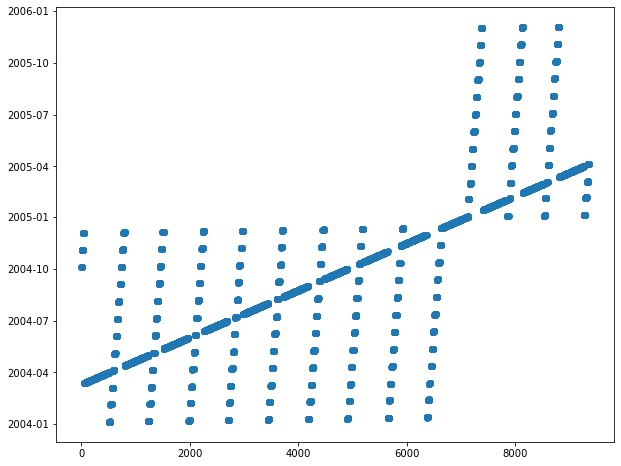

In [4]:
plt.scatter(np.arange(len(data)), data.index)

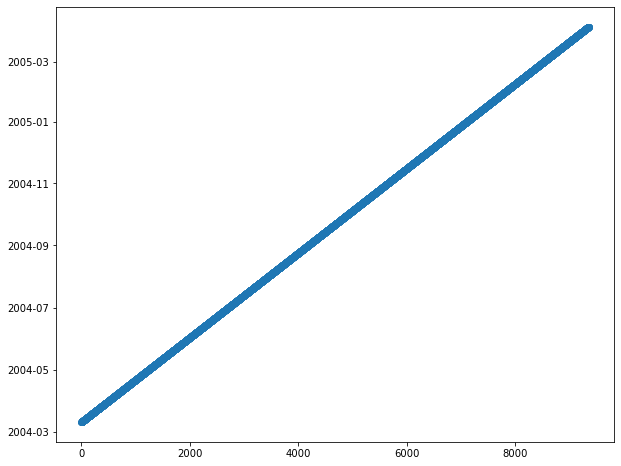

In [5]:
data = pd.read_csv(
    "AirQuality_Sensors.csv",
    parse_dates={"Date_Time": ["Date", "Time"]},
    index_col="Date_Time",
    dayfirst=True,
    na_values="-200"
)
plt.scatter(np.arange(len(data)), data.index)

In [6]:
#Select the data of interest to work with
df = data[['C6H6(GT)','PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)', 
      'PT08.S5(O3)','T','RH','AH']]

#rename columns
columns={'C6H6(GT)':'C6H6','PT08.S1(CO)':'CO','PT08.S2(NMHC)':'NMHC','PT08.S3(NOx)':'NOX','PT08.S4(NO2)':'NO2','PT08.S5(O3)':'O3'}
df = df.rename(columns=columns)
df.head()

,C6H6,CO,NMHC,NOX,NO2,O3,T,RH,AH
Date_Time,,,,,,,,,
2004-03-10 18:00:00,11.9,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,9.4,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,9.0,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,9.2,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,6.5,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C6H6    8991 non-null   float64
 1   CO      8991 non-null   float64
 2   NMHC    8991 non-null   float64
 3   NOX     8991 non-null   float64
 4   NO2     8991 non-null   float64
 5   O3      8991 non-null   float64
 6   T       8991 non-null   float64
 7   RH      8991 non-null   float64
 8   AH      8991 non-null   float64
dtypes: float64(9)
memory usage: 731.0 KB


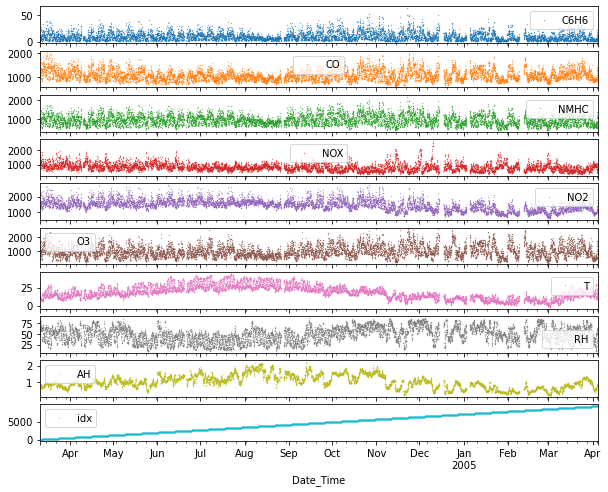

In [8]:
time_series_plot_kwargs = dict(
    subplots=True,
    marker='.',
    markersize=.5,
    linestyle="",
    figsize=(10, 8))
df.assign(idx=np.arange(len(df))).plot(**time_series_plot_kwargs);

## Observe!

What do you observe about:

1. The range of values in each column?
2. The times where there seem to be data?
3. Any systematic differences in the data over time?

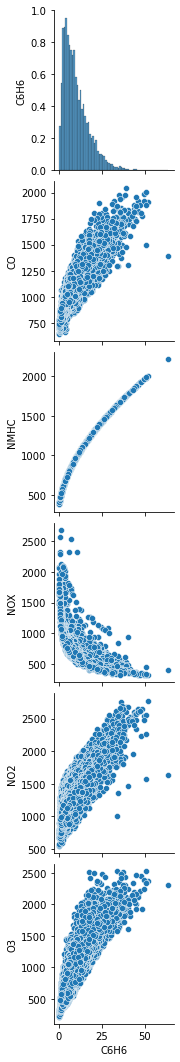

In [9]:
df_simple = df.iloc[:, :-3]
sns.pairplot(df_simple, x_vars=['C6H6'])

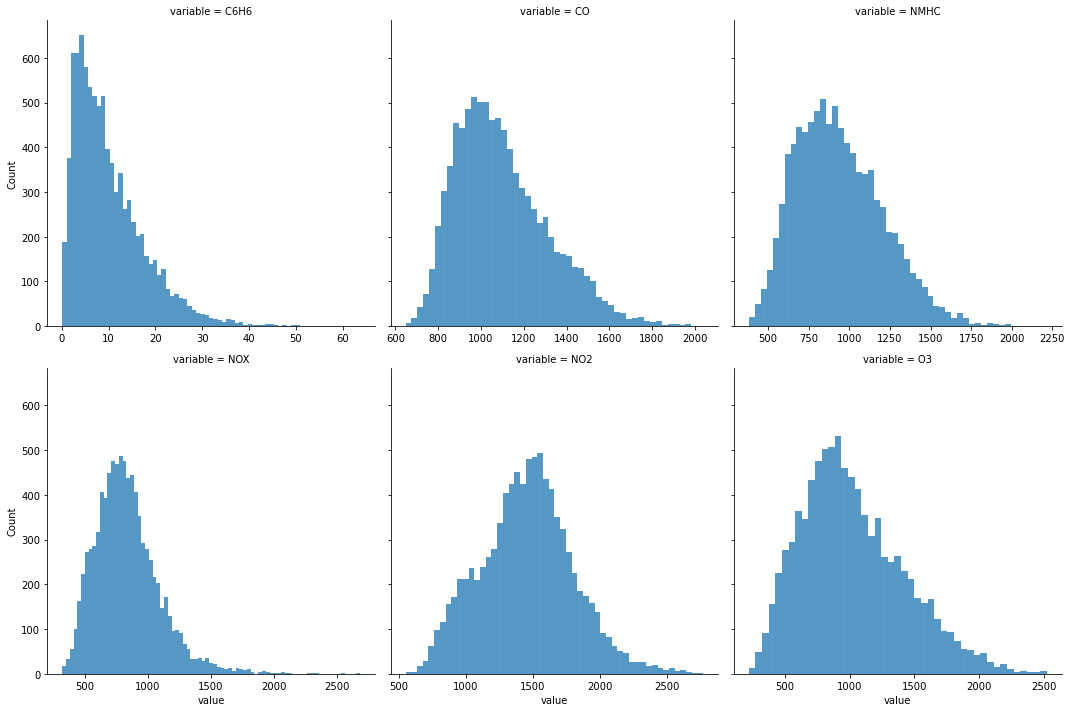

In [10]:
# See https://github.com/mwaskom/seaborn/issues/2472
sns.displot(
    df_simple.melt(),
    x="value", col="variable",
    common_bins=False,
    col_wrap=3, facet_kws={'sharex': False})

## Observe!

1. Remember that we're trying to predict benzene concentration (C6H6). What variable has the strongest relationship with it? How hard do you think it will be to predict the concentration using that variable?
2. What do you notice about the distributions? Which are skewed, in which direction?

# Splitting Data

We need to split the data in two ways: first, to separate the features (cheap) from the target (expensive), and second, to separate train from test.

In [11]:
target_name = 'C6H6'
X = df.drop([target_name], axis=1)
y = df[target_name]

Now to split train from test. How should we do this? Approach 1:

In [12]:
(
    X_train, X_test,
    y_train, y_test
) = train_test_split(X, y, test_size=0.2, random_state=12345)

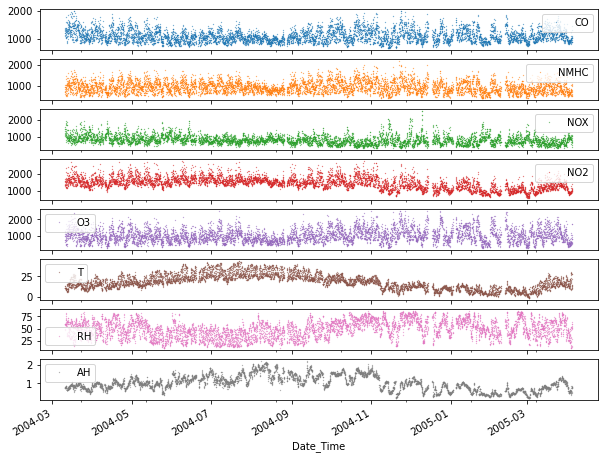

In [13]:
X_train.plot(**time_series_plot_kwargs);

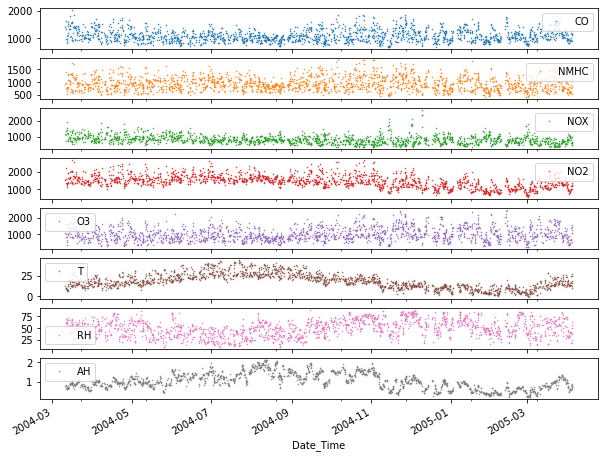

In [14]:
X_test.plot(**dict(time_series_plot_kwargs, markersize=1));

## Observe!

1. When does the training data occur? The testing data?
2. Suppose we try to predict each test data point by using the data in the training set that's closest to it. How well do you think this would work?

In light of those observations, let's use a different approach:

In [15]:
(
    X_train, X_test,
    y_train, y_test
) = train_test_split(X, y, test_size=0.2, shuffle=False)
# Note that `random_state` no longer has any effect here.

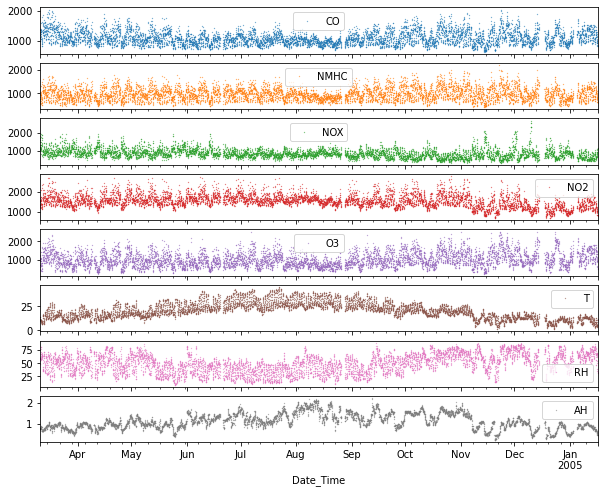

In [16]:
X_train.plot(**time_series_plot_kwargs);

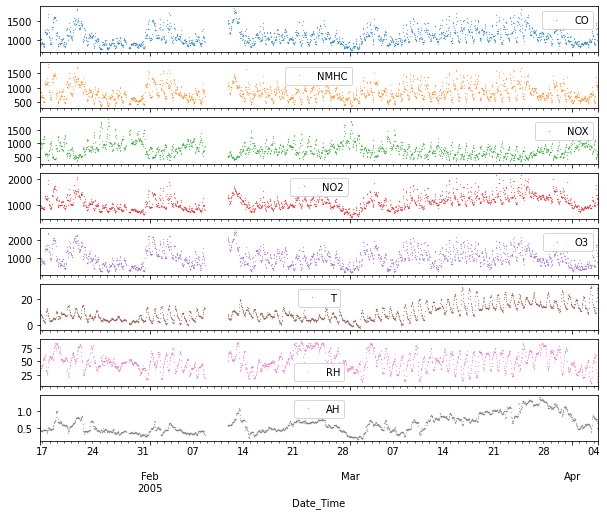

In [17]:
X_test.plot(**dict(time_series_plot_kwargs));

## Observe!

1. When does the training data occur? The testing data?
2. Suppose we try to predict each test data point by using the data in the training set that's closest to it. How well do you think this would work?

# Dealing with Missing Values

<AxesSubplot:ylabel='Date_Time'>

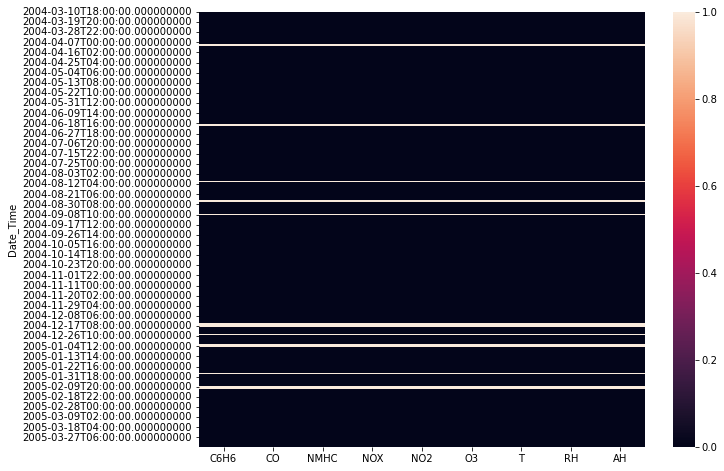

In [18]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Date_Time'>

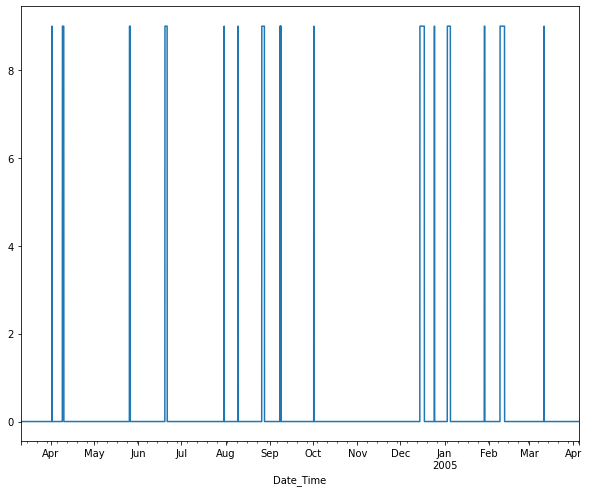

In [19]:
df.isnull().sum(axis=1).plot()

# What does `IterativeImputer` do?

In [22]:
# IterativeImputer is still experimental: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [30]:
df_imputed = IterativeImputer().fit_transform(df)

In [32]:
row_had_missing = df.isna().sum(axis=1) > 0
pd.DataFrame(df_imputed[row_had_missing], columns=df.columns)

,C6H6,CO,NMHC,NOX,NO2,O3,T,RH,AH
0,10.083105,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.02553
1,10.083105,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.02553
2,10.083105,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.02553
3,10.083105,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.02553
4,10.083105,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.02553
...,...,...,...,...,...,...,...,...,...
361,10.083105,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.02553
362,10.083105,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.02553
363,10.083105,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.02553
364,10.083105,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.02553


## Observe!

What do you notice about the values that were imputed?

## Data Leakage

Notice how we used the entire original dataset in the imputation. List the two potential issues that could come up when doing this. (Assume, hypothetically, that there were actually different features missing in different cases.)

1. *something about what columns we get to use for imputing*
2. *something about what rows we get to use for imputing*

In [36]:
X_train_imputed = IterativeImputer().fit_transform(X_train)
row_had_missing = X_train.isna().sum(axis=1) > 0
pd.DataFrame(X_train_imputed[row_had_missing], columns=X_train.columns)

,CO,NMHC,NOX,NO2,O3,T,RH,AH
0,1101.245802,961.086745,848.404719,1540.220402,1023.434837,20.382623,48.978348,1.124781
1,1101.245802,961.086745,848.404719,1540.220402,1023.434837,20.382623,48.978348,1.124781
2,1101.245802,961.086745,848.404719,1540.220402,1023.434837,20.382623,48.978348,1.124781
3,1101.245802,961.086745,848.404719,1540.220402,1023.434837,20.382623,48.978348,1.124781
4,1101.245802,961.086745,848.404719,1540.220402,1023.434837,20.382623,48.978348,1.124781
...,...,...,...,...,...,...,...,...
275,1101.245802,961.086745,848.404719,1540.220402,1023.434837,20.382623,48.978348,1.124781
276,1101.245802,961.086745,848.404719,1540.220402,1023.434837,20.382623,48.978348,1.124781
277,1101.245802,961.086745,848.404719,1540.220402,1023.434837,20.382623,48.978348,1.124781
278,1101.245802,961.086745,848.404719,1540.220402,1023.434837,20.382623,48.978348,1.124781


## Observe!

Were these values the same or different than when we used the full dataframe (`df`)? (Note that we have one fewer column also.)

# Drop missing targets

In [59]:
target_not_missing = ~y.isna()
X_full = X[target_not_missing]
y_full = y[target_not_missing]
X_full.isna().sum()

CO      0
NMHC    0
NOX     0
NO2     0
O3      0
T       0
RH      0
AH      0
dtype: int64

In [60]:
(
    X_train, X_test,
    y_train, y_test
) = train_test_split(X_full, y_full, test_size=0.2, shuffle=False)
assert not any(np.any(arr.isna()) for arr in [X_train, X_test, y_train, y_test])

It turns out that no features are missing after this drop.

# Feature Scaling

In [61]:
scaler1 = MinMaxScaler()
scaled_1 = scaler1.fit_transform(df)
pd.DataFrame(scaled_1, columns=df.columns).describe().round(3)

,C6H6,CO,NMHC,NOX,NO2,O3,T,RH,AH
count,8991.000,8991.000,8991.000,8991.000,8991.000,8991.000,8991.000,8991.000,8991.000
mean,0.157,0.325,0.304,0.217,0.407,0.348,0.435,0.504,0.411
std,0.117,0.156,0.146,0.109,0.156,0.173,0.190,0.218,0.197
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.068,0.208,0.192,0.142,0.304,0.222,0.295,0.335,0.270
50%,0.127,0.299,0.287,0.205,0.410,0.322,0.424,0.508,0.396
75%,0.219,0.419,0.400,0.274,0.505,0.457,0.566,0.670,0.552
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [62]:
scaler1.data_max_

array([6.370e+01, 2.040e+03, 2.214e+03, 2.683e+03, 2.775e+03, 2.523e+03,
       4.460e+01, 8.870e+01, 2.231e+00])

In [63]:
scaler2 = StandardScaler()
scaled_2 = scaler2.fit_transform(df)
pd.DataFrame(scaled_2, columns=df.columns).describe().round(3)

,C6H6,CO,NMHC,NOX,NO2,O3,T,RH,AH
count,8991.000,8991.000,8991.000,8991.000,8991.000,8991.000,8991.000,8991.000,8991.000
mean,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.340,-2.086,-2.084,-2.000,-2.615,-2.013,-2.289,-2.312,-2.082
25%,-0.763,-0.750,-0.767,-0.691,-0.662,-0.731,-0.738,-0.776,-0.715
50%,-0.253,-0.170,-0.113,-0.115,0.019,-0.150,-0.059,0.021,-0.075
75%,0.526,0.604,0.663,0.522,0.629,0.629,0.689,0.766,0.714
max,7.197,4.331,4.778,7.194,3.809,3.765,2.976,2.279,2.985


In [64]:
scaler2.mean_, scaler2.var_

(array([1.00831053e+01, 1.09983317e+03, 9.39153376e+02, 8.35493605e+02,
        1.45626460e+03, 1.02290613e+03, 1.83178289e+01, 4.92342009e+01,
        1.02553027e+00]),
 array([5.54936407e+01, 4.71185014e+04, 7.11910924e+04, 6.59478002e+04,
        1.19845813e+05, 1.58772067e+05, 7.79975923e+01, 2.99841412e+02,
        1.63046484e-01]))

## Observe!

1. What did `MinMaxScaler` do to the min and max?
2. What did `StandardScaler` do to the mean and std?
3. Which column has the highest variance (`std`) after the `MinMaxScaler`?
4. Which column has the highest variance (`std`) after the `StandardScaler`?
5. What information did the scaler objects learn from the data they were given? Does that depend on the training set, test set, or what?


# Pipelines

In [65]:
preproc_pipeline = make_pipeline(
    StandardScaler(),
    IterativeImputer()
)
X_train_scaled = preproc_pipeline.fit_transform(X_train, y_train)
X_train_scaled.shape

(7192, 8)

In [66]:
X_test_scaled = preproc_pipeline.transform(X_test)

## Baselines

In [70]:
linreg = LinearRegression().fit(X_train, y_train)
r2_score(y_test, linreg.predict(X_test))

0.933122964342833

Random forest.

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rfreg = RandomForestRegressor().fit(X_train, y_train)
r2_score(y_test, rfreg.predict(X_test))

0.9998662770896344

Splines.

In [83]:
from sklearn.preprocessing import SplineTransformer
spline_model = make_pipeline(
    SplineTransformer(n_knots=3),
    LinearRegression()
).fit(X_train, y_train)
r2_score(y_test, spline_model.predict(X_test))

0.9999772685857248

In [73]:
from sklearn.isotonic import IsotonicRegression
isotonic = IsotonicRegression().fit(X_train.iloc[:, 1], y_train)

In [80]:
np.isnan(X_test.iloc[:, 1].values).sum()

0

In [79]:
r2_score(y_test, isotonic.predict(X_test.iloc[:, 1].values))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').